In [2]:
from google.colab import files
uploaded = files.upload()



Saving data1a.zip to data1a.zip


In [3]:
import zipfile

with zipfile.ZipFile("data1a.zip", 'r') as zip_ref:
    zip_ref.extractall("car_damage_dataset")


In [4]:
import os
os.listdir("/content/car_damage_dataset")


['data1a']

In [5]:
train_dir = "/content/car_damage_dataset/data1a/training"
val_dir = "/content/car_damage_dataset/data1a/validation"


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescale validation images
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load validation images
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load base model without top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [9]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6859 - loss: 0.5840 - val_accuracy: 0.8239 - val_loss: 0.4034
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.8547 - loss: 0.3732 - val_accuracy: 0.8478 - val_loss: 0.3408
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.8672 - loss: 0.3363 - val_accuracy: 0.8804 - val_loss: 0.2942
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8760 - loss: 0.3144 - val_accuracy: 0.9022 - val_loss: 0.2690
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9027 - loss: 0.2690 - val_accuracy: 0.8674 - val_loss: 0.2945
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.9077 - loss: 0.2486 - val_accuracy: 0.8565 - val_loss: 0.2888
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8912 - loss: 0.2685 - val_accuracy: 0.9087 - val_loss: 0.2328
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.9097 - loss: 0.2218 - val_accuracy: 0.9130 - v

In [10]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8942 - loss: 0.2646
Validation Accuracy: 90.00%


In [11]:
model.save("car_damage_model.h5")


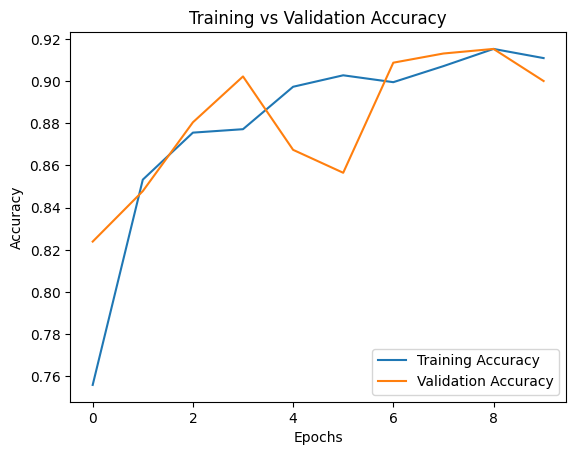

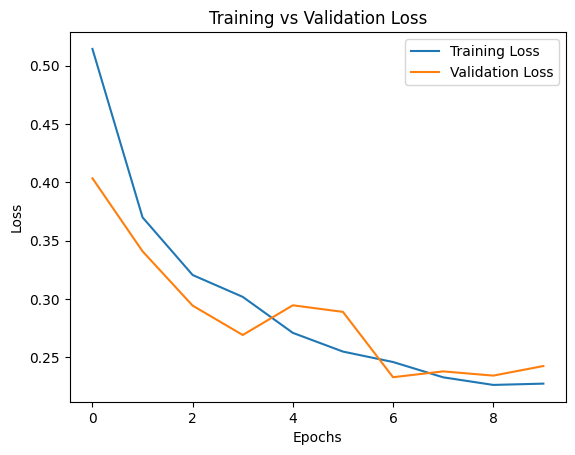

In [12]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()



In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = "/content/car_damage_dataset/data1a/validation/00-damage/0001.JPEG"  # change this path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]
label = "Whole Car" if prediction > 0.5 else "Damaged Car"
print(f"Prediction: {label} ({prediction:.4f})")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction: Damaged Car (0.2567)


In [18]:
from google.colab import files
files.download("car_damage_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>